# HOMEWORK 4

### Author : Abhijay Ghildyal
### BSysE 530 Machine Vision

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

## Load data

In [3]:
img = loadmat('HC_CD1.mat')

In [4]:
img['HC_CD'][:,:,0]

array([[18, 12, 22, ..., 17, 23, 22],
       [20, 21, 23, ..., 23, 14, 28],
       [ 9, 26, 24, ..., 26, 23, 21],
       ...,
       [27, 23, 22, ..., 19, 20, 24],
       [28, 21, 20, ..., 25, 21, 26],
       [29, 23, 20, ..., 21, 16, 29]], dtype=uint8)

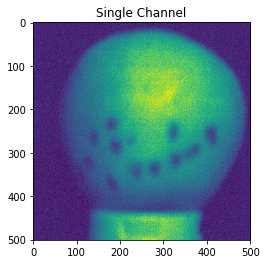

In [45]:
plt.title('Single Channel')
plt.imshow(img['HC_CD'][:,:,344])
plt.show()

## Part 1

In [59]:
img_ = img['HC_CD'][:,:,344]

### Without histogram enhancement

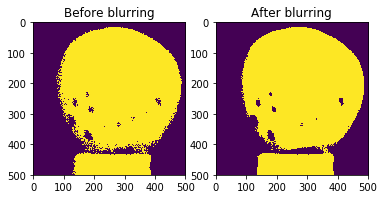

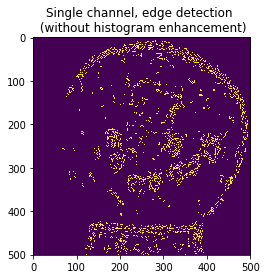

In [164]:
blurred = cv2.GaussianBlur(img_, (3, 3), 0)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img_>50)
ax[1].imshow(blurred>50)
ax[0].set_title('Before blurring')
ax[1].set_title('After blurring')
plt.show()
canny = cv2.Canny(blurred, 20, 45)
plt.imshow(canny)
plt.title('Single channel, edge detection \n (without histogram enhancement)')
plt.show()

### With histogram enhancement

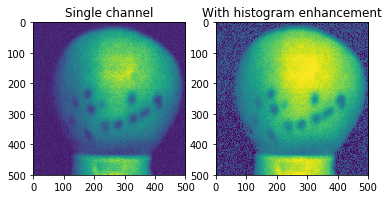

In [61]:
img__ = cv2.equalizeHist(img_)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img_)
ax[1].imshow(img__)
ax[0].set_title('Single channel')
ax[1].set_title('With histogram enhancement')
plt.show()

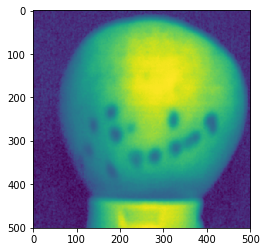

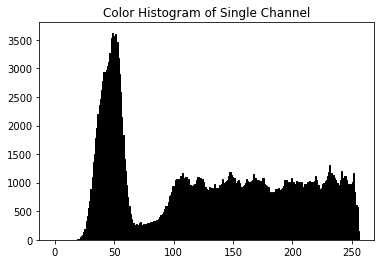

In [79]:
blurred = cv2.GaussianBlur(img__, (7, 7), 0)
plt.imshow(blurred)
plt.show()
plt.hist(blurred.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k') #calculating histogram
plt.title('Color Histogram of Single Channel')
plt.show()

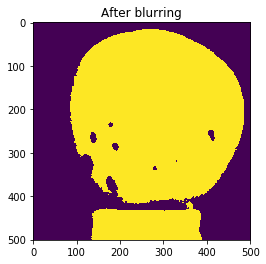

In [63]:
plt.imshow((blurred>110).astype(int))
plt.title("After blurring")
plt.show()

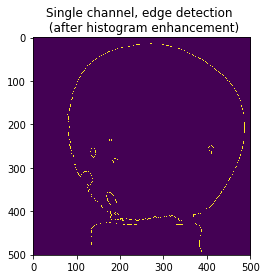

In [64]:
canny2 = cv2.Canny(np.uint8(blurred>105), 0, 1)
plt.imshow(canny2)
plt.title('Single channel, edge detection \n (after histogram enhancement)')
plt.show()

## Part 2

In [122]:
hyperspectral_img = np.expand_dims(img['HC_CD'][:,:,650], axis=2)
for ind,i in enumerate(range(652,750,2)):
    hyperspectral_img = np.append(hyperspectral_img, np.expand_dims(img['HC_CD'][:,:,i], axis=2),axis=2)

In [123]:
hyperspectral_img.shape

(501, 500, 50)

In [124]:
meanVector = np.zeros((hyperspectral_img.shape[0:2]))
euclidean_distance = np.zeros((hyperspectral_img.shape[0:2]))
mahalanobis_distance = np.zeros((hyperspectral_img.shape[0:2]))
for r in range(hyperspectral_img.shape[0]):
    for c in range(hyperspectral_img.shape[1]):
        meanVal = np.mean(hyperspectral_img[r,c,:])
        euclidean_distance[r,c] = np.abs(np.linalg.norm(hyperspectral_img[r,c,:]-meanVal))
        cov = np.cov(hyperspectral_img[r,c,:])
        mahalanobis_distance[r,c] = np.sqrt(meanVal*cov*meanVal)

### Without histogram enhancement

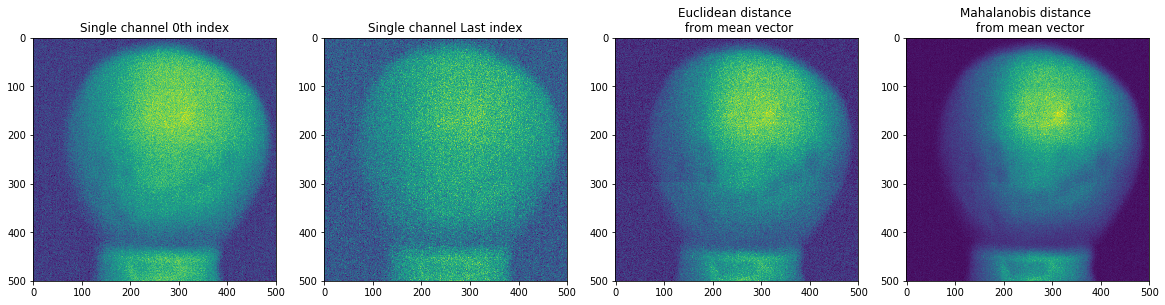

In [125]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))
ax[0].imshow(hyperspectral_img[:,:,0])
ax[1].imshow(hyperspectral_img[:,:,-1])
ax[2].imshow(euclidean_distance)
ax[3].imshow(mahalanobis_distance)
ax[0].set_title('Single channel 0th index')
ax[1].set_title('Single channel Last index')
ax[2].set_title('Euclidean distance \n from mean vector')
ax[3].set_title('Mahalanobis distance \n from mean vector')
plt.show()

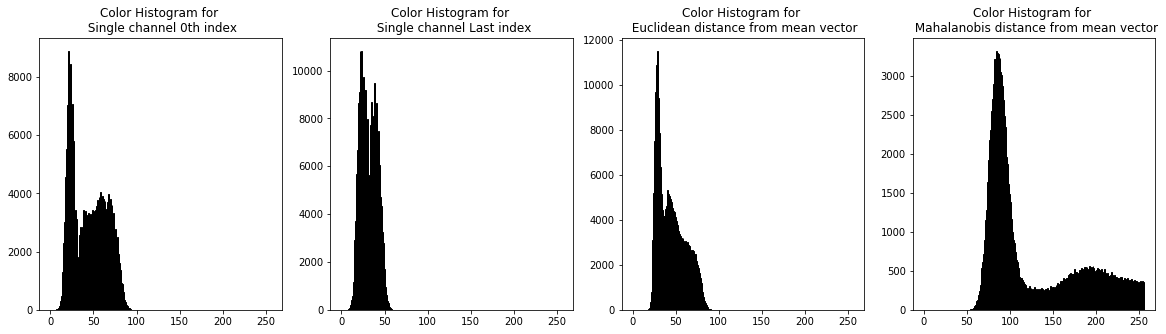

In [126]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))
ax[0].hist(hyperspectral_img[:,:,0].ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
ax[1].hist(hyperspectral_img[:,:,-1].ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
ax[2].hist(euclidean_distance.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
ax[3].hist(mahalanobis_distance.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k')
ax[0].set_title('Color Histogram for \n Single channel 0th index')
ax[1].set_title('Color Histogram for \n Single channel Last index')
ax[2].set_title('Color Histogram for \n Euclidean distance from mean vector')
ax[3].set_title('Color Histogram for \n Mahalanobis distance from mean vector')
plt.show()

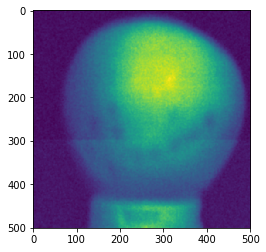

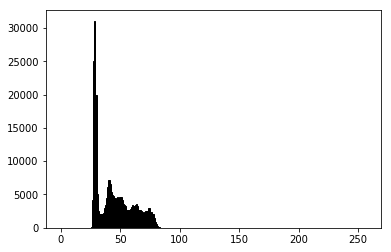

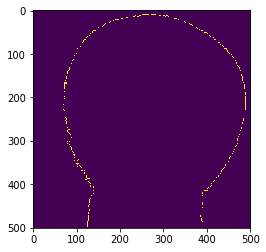

In [127]:
blurred_euclidean = cv2.GaussianBlur(euclidean_distance, (7, 7), 0)
plt.imshow(blurred_euclidean)
plt.show()

plt.hist(blurred_euclidean.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k') #calculating histogram
plt.show()

canny_euclidean = cv2.Canny(np.uint8(blurred_euclidean>32), 0, 1)
plt.imshow(canny_euclidean)
plt.show()

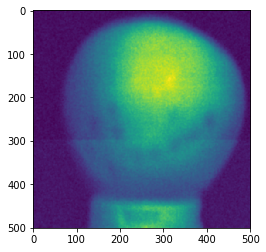

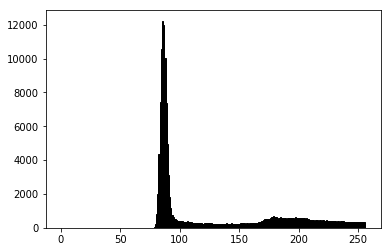

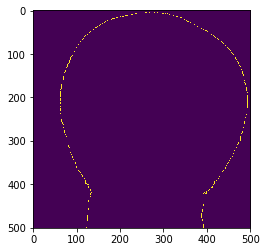

In [128]:
blurred_mahalanobis = cv2.GaussianBlur(mahalanobis_distance, (7, 7), 0)
plt.imshow(blurred_euclidean)
plt.show()

plt.hist(blurred_mahalanobis.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k') #calculating histogram
plt.show()

canny_mahalanobis = cv2.Canny(np.uint8(blurred_mahalanobis>100), 0, 1)
plt.imshow(canny_mahalanobis)
plt.show()

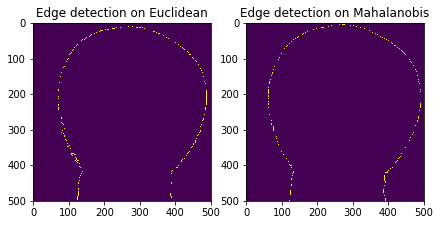

In [129]:
fig, ax = plt.subplots(ncols=2, figsize=(7,5))
ax[0].imshow(canny_euclidean)
ax[1].imshow(canny_mahalanobis)
ax[0].set_title('Edge detection on Euclidean')
ax[1].set_title('Edge detection on Mahalanobis')
plt.show()

### With histogram enhancement

In [130]:
euclidean_distance_ = cv2.equalizeHist(np.uint8(euclidean_distance))
mahalanobis_distance_ = cv2.equalizeHist(np.uint8(mahalanobis_distance))

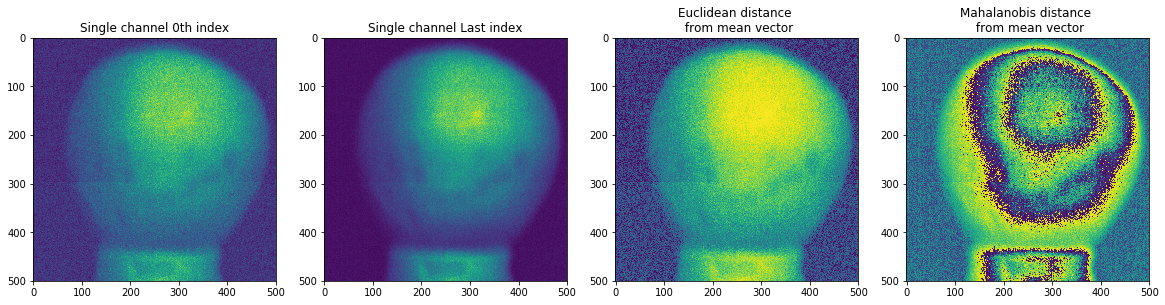

In [141]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))
ax[0].imshow(euclidean_distance)
ax[1].imshow(mahalanobis_distance)
ax[2].imshow(euclidean_distance_)
ax[3].imshow(mahalanobis_distance_)
ax[0].set_title('Single channel 0th index')
ax[1].set_title('Single channel Last index')
ax[2].set_title('Euclidean distance \n from mean vector')
ax[3].set_title('Mahalanobis distance \n from mean vector')
plt.show()

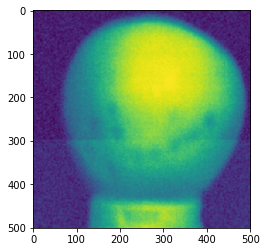

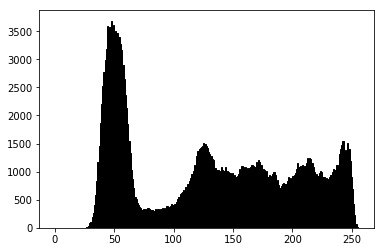

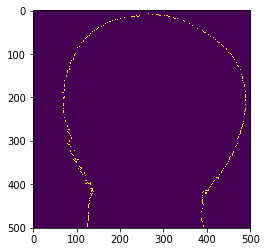

In [148]:
blurred_euclidean = cv2.GaussianBlur(euclidean_distance_, (7, 7), 0)
plt.imshow(blurred_euclidean)
plt.show()

plt.hist(blurred_euclidean.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k') #calculating histogram
plt.show()

canny_euclidean = cv2.Canny(np.uint8(blurred_euclidean>75), 0, 1)
plt.imshow(canny_euclidean)
plt.show()

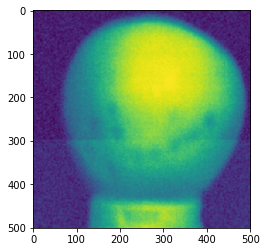

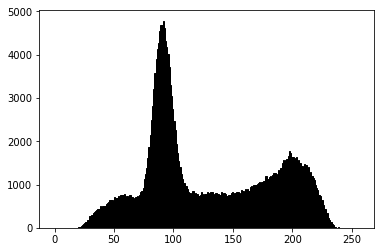

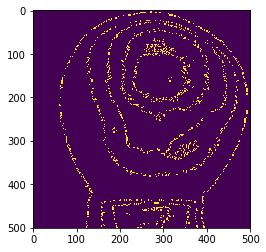

In [158]:
blurred_mahalanobis = cv2.GaussianBlur(mahalanobis_distance_, (7, 7), 0)
plt.imshow(blurred_euclidean)
plt.show()

plt.hist(blurred_mahalanobis.ravel(), bins=256, range=(0.0, 256), fc='k', ec='k') #calculating histogram
plt.show()

canny_mahalanobis = cv2.Canny(np.uint8((blurred_mahalanobis>120) & (blurred_mahalanobis<130)), 0, 1)
plt.imshow(canny_mahalanobis)
plt.show()

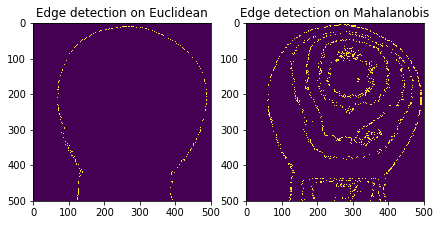

In [159]:
fig, ax = plt.subplots(ncols=2, figsize=(7,5))
ax[0].imshow(canny_euclidean)
ax[1].imshow(canny_mahalanobis)
ax[0].set_title('Edge detection on Euclidean')
ax[1].set_title('Edge detection on Mahalanobis')
plt.show()